In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rawdf=pd.read_csv('arcos-ma-suffolk-25025-itemized.tsv',sep='\t')

/home/prasadb/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rawdf.TRANSACTION_DATE=pd.to_datetime(rawdf.TRANSACTION_DATE,format="%m%d%Y")

In [5]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189341 entries, 0 to 189340
Data columns (total 42 columns):
REPORTER_DEA_NO          189341 non-null object
REPORTER_BUS_ACT         189341 non-null object
REPORTER_NAME            189341 non-null object
REPORTER_ADDL_CO_INFO    12684 non-null object
REPORTER_ADDRESS1        189341 non-null object
REPORTER_ADDRESS2        57183 non-null object
REPORTER_CITY            189341 non-null object
REPORTER_STATE           189341 non-null object
REPORTER_ZIP             189341 non-null int64
REPORTER_COUNTY          189341 non-null object
BUYER_DEA_NO             189341 non-null object
BUYER_BUS_ACT            189341 non-null object
BUYER_NAME               189341 non-null object
BUYER_ADDL_CO_INFO       130530 non-null object
BUYER_ADDRESS1           189341 non-null object
BUYER_ADDRESS2           25011 non-null object
BUYER_CITY               189341 non-null object
BUYER_STATE              189341 non-null object
BUYER_ZIP                1893

In [8]:
rawdf.Ingredient_Name.value_counts()

OXYCODONE HYDROCHLORIDE                    125668
HYDROCODONE BITARTRATE HEMIPENTAHYDRATE     63673
Name: Ingredient_Name, dtype: int64

In [10]:
rawdf.Measure.value_counts()

TAB    189341
Name: Measure, dtype: int64

In [15]:
for i in rawdf.columns :
    print(rawdf[i].nunique(), str("  "), str(i) )

62    REPORTER_DEA_NO
3    REPORTER_BUS_ACT
55    REPORTER_NAME
12    REPORTER_ADDL_CO_INFO
61    REPORTER_ADDRESS1
11    REPORTER_ADDRESS2
54    REPORTER_CITY
25    REPORTER_STATE
56    REPORTER_ZIP
46    REPORTER_COUNTY
190    BUYER_DEA_NO
3    BUYER_BUS_ACT
108    BUYER_NAME
93    BUYER_ADDL_CO_INFO
170    BUYER_ADDRESS1
41    BUYER_ADDRESS2
17    BUYER_CITY
1    BUYER_STATE
29    BUYER_ZIP
1    BUYER_COUNTY
1    TRANSACTION_CODE
2    DRUG_CODE
587    NDC_NO
2    DRUG_NAME
69    QUANTITY
0    UNIT
2    ACTION_INDICATOR
49990    ORDER_FORM_NO
33    CORRECTION_NO
2    STRENGTH
2179    TRANSACTION_DATE
249    CALC_BASE_WT_IN_GM
89    DOSAGE_UNIT
152136    TRANSACTION_ID
226    Product_Name
2    Ingredient_Name
1    Measure
2    MME_Conversion_Factor
41    Combined_Labeler_Name
37    Revised_Company_Name
40    Reporter_family
12    dos_str


In [21]:
rawdf.loc[rawdf.Combined_Labeler_Name=='Brighton Pharmaceuticals, Inc.'].TRANSACTION_DATE

431      2012-08-03
22979    2011-08-05
141003   2011-11-01
Name: TRANSACTION_DATE, dtype: datetime64[ns]

In [23]:
rawdf.BUYER_NAME.value_counts()

CVS PHARMACY, INC.            65927
WALGREEN EASTERN CO., INC.    36835
MAXI DRUG, INC.               14679
BROWN'S REXALL DRUG            3644
SULLIVAN'S PHARMACY INC        2888
                              ...  
WOSKO, TIMOTHY DVM                1
LOWNEY, CHARLES W DO              1
FANG, LESLIE MD                   1
ASNIS, PETER D (MD)               1
ISSA, NICOLAS C MD                1
Name: BUYER_NAME, Length: 108, dtype: int64

In [24]:
cvs=rawdf.loc[rawdf.BUYER_NAME=="CVS PHARMACY, INC."]

In [25]:
cvs.head()

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
835,RD0108200,DISTRIBUTOR,CARDINAL HEALTH,NaN,11 CENTENNIAL DRIVE,NaN,PEABODY,MA,1960,ESSEX,...,200.0,602026122,OXYCODONE HYDROCHLORIDE EXTENDED-REL,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Teva Pharmaceuticals USA, Inc.",Teva,Cardinal Health,20.0
836,RD0108200,DISTRIBUTOR,CARDINAL HEALTH,NaN,11 CENTENNIAL DRIVE,NaN,PEABODY,MA,1960,ESSEX,...,500.0,603053247,PERCOCET TABLETS 10MG OXYCODONE HCL/,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Endo Pharmaceuticals, Inc.","Endo Pharmaceuticals, Inc.",Cardinal Health,10.0
837,RD0108200,DISTRIBUTOR,CARDINAL HEALTH,NaN,11 CENTENNIAL DRIVE,NaN,PEABODY,MA,1960,ESSEX,...,100.0,604022547,ENDOCET TABS - 10MG OXYCODONE.HCL &,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,"Endo Pharmaceuticals, Inc.",Cardinal Health,10.0
838,RD0108200,DISTRIBUTOR,CARDINAL HEALTH,NaN,11 CENTENNIAL DRIVE,NaN,PEABODY,MA,1960,ESSEX,...,1200.0,607049559,OXYCODONE HCL/ACETAMINOPHEN 5MG/325M,OXYCODONE HYDROCHLORIDE,TAB,1.5,SpecGx LLC,Mallinckrodt,Cardinal Health,5.0
839,RD0108200,DISTRIBUTOR,CARDINAL HEALTH,NaN,11 CENTENNIAL DRIVE,NaN,PEABODY,MA,1960,ESSEX,...,200.0,607056158,OXYCODONE.HCL 10MG / APAP 650MG TABL,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Actavis Pharma, Inc.","Allergan, Inc.",Cardinal Health,10.0


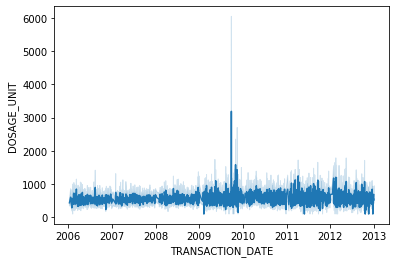

In [27]:
sns.lineplot(data=cvs,x='TRANSACTION_DATE',y='DOSAGE_UNIT')

In [30]:
rawdf.Combined_Labeler_Name.value_counts()

SpecGx LLC                             71217
Actavis Pharma, Inc.                   51974
Par Pharmaceutical                     19409
Purdue Pharma LP                       16301
West-Ward Pharmaceuticals Corp.         5065
Teva Pharmaceuticals USA, Inc.          5003
Endo Pharmaceuticals, Inc.              4982
Amneal Pharmaceuticals LLC              4373
KVK-Tech, Inc.                          4220
Ethex Corporation                       2447
AbbVie Inc.                             1690
Mylan Pharmaceuticals, Inc.              892
Sun Pharmaceutical Industries, Inc.      657
CorePharma, LLC                          182
Dispensing Solutions Inc.                172
Pfizer Laboratories Div Pfizer Inc       149
Xanodyne Pharmaceuticals, Inc.           114
UCB, Inc.                                100
Lupin Pharmaceuticals,Inc.                89
Victory Pharma, Inc.                      76
AAI Pharma                                49
Teamm Pharmaceuticals, Inc.               42
Allergan, 

In [31]:
rawdf.REPORTER_NAME.value_counts()

CARDINAL HEALTH                          62515
MCKESSON CORPORATION                     31934
WALGREEN CO                              22265
CVS PHARMACY INC                         21411
AMERISOURCEBERGEN DRUG CORP               7411
WALGREEN EASTERN CO., INC.                6809
WALGREEN EASTERN CO INC                   6091
KINRAY INC                                5327
P J C DISTRIBUTOR CO INC                  5128
ECKERD CORPORATION                        2779
ADVANTAGE LOGISTICS                       2633
RITE AID DAYVILLE DISTRIBUTION CENTER     2526
H. D. SMITH                               2408
ANDA PHARMACEUTICALS INC                  2299
CARDINAL HEALTH 110, LLC                  1669
AMERICAN SALES COMPANY                    1653
CVS INDIANA                               1635
BURLINGTON DRUG COMPANY                    914
ANDA, INC                                  609
ASSOCIATED PHARMACIES INC                  268
QUEST PHARMACEUTICALS INC                  217
THE HARVARD D

In [39]:
dosagePerOrder=rawdf['DOSAGE_UNIT'].groupby(by=rawdf.BUYER_DEA_NO  ).mean()

In [40]:
buyerNAME=rawdf['BUYER_NAME'].groupby(by=rawdf.BUYER_DEA_NO ).max()

In [44]:
dpodf=pd.DataFrame({'buyer_name':buyerNAME,'dosage_per_order':dosagePerOrder})

In [45]:
dpodf

,buyer_name,dosage_per_order
BUYER_DEA_NO,,
AB2729789,BROWN'S REXALL DRUG,441.136114
AC3096369,"CALDER, JAMES S MD",1000.000000
AC6556178,"CVS PHARMACY, INC.",671.382740
AD2471883,"CVS PHARMACY, INC.",539.449090
AD8763511,"DIXIT, NARENDRA BEHARILAL DMD",1000.000000
...,...,...
FW0441092,"WALGREEN EASTERN CO., INC.",321.953010
FW0511510,WHITTIER HEALTH PHARMACY INC,602.648148
FW1439795,"WALGREEN EASTERN CO., INC.",371.633282


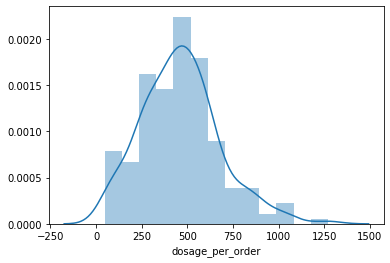

In [53]:
sns.distplot(dpodf.dosage_per_order)

In [54]:
dpodf.loc[dpodf.dosage_per_order>1000]

,buyer_name,dosage_per_order
BUYER_DEA_NO,,
AS1955888,"D A W INC, DBA STRAND PHARMACY",1270.378788
AS3006093,SULLIVAN'S PHARMACY INC,1026.364266
BE9056575,EGLESTON SQUARE PHARMACY INC,1073.214286


In [58]:
dosagePerOrderPerYear=rawdf['DOSAGE_UNIT'].groupby(by=[rawdf.BUYER_DEA_NO,rawdf.TRANSACTION_DATE.dt.year] ).mean()

In [59]:
dosagePerOrderPerYear.head()

BUYER_DEA_NO  TRANSACTION_DATE
AB2729789     2006                440.735294
              2007                476.424051
              2008                503.429603
              2009                476.160338
              2010                401.141553
Name: DOSAGE_UNIT, dtype: float64

In [62]:
dosagePerOrderPerYear.index

MultiIndex([('AB2729789', 2006),
            ('AB2729789', 2007),
            ('AB2729789', 2008),
            ('AB2729789', 2009),
            ('AB2729789', 2010),
            ('AB2729789', 2011),
            ('AB2729789', 2012),
            ('AC3096369', 2008),
            ('AC6556178', 2006),
            ('AC6556178', 2007),
            ...
            ('FW0511510', 2011),
            ('FW0511510', 2012),
            ('FW1439795', 2009),
            ('FW1439795', 2010),
            ('FW1439795', 2011),
            ('FW1439795', 2012),
            ('FW1815351', 2010),
            ('FW1815351', 2011),
            ('FW1815351', 2012),
            ('FW3140845', 2012)],
           names=['BUYER_DEA_NO', 'TRANSACTION_DATE'], length=921)

In [63]:
dosagePerOrderPerYear.shape

(921,)

In [64]:
dosagePerOrderPerYear.tail()

BUYER_DEA_NO  TRANSACTION_DATE
FW1439795     2012                378.614719
FW1815351     2010                608.915663
              2011                556.984479
              2012                557.941834
FW3140845     2012                321.333333
Name: DOSAGE_UNIT, dtype: float64

In [84]:
temp=rawdf.pivot_table(values='DOSAGE_UNIT', aggfunc=np.mean , index=rawdf.BUYER_DEA_NO, columns=rawdf.TRANSACTION_DATE.dt.year ,fill_value=0 )

In [85]:
temp.head()

TRANSACTION_DATE,2006,2007,2008,2009,2010,2011,2012
BUYER_DEA_NO,,,,,,,
AB2729789,440.735294,476.424051,503.429603,476.160338,401.141553,382.568807,371.162791
AC3096369,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
AC6556178,561.788618,766.810345,773.304158,733.583960,659.777778,627.114428,585.871965
AD2471883,464.893617,535.135135,490.522876,561.290323,587.947883,560.691824,572.695035
AD8763511,1000.000000,1000.000000,0.000000,750.000000,0.000000,1000.000000,1500.000000
